In [198]:
from Bio import SeqIO
import pandas as pd
import numpy as np

In [199]:
all_genes_data = SeqIO.parse("orf_genomic.fasta", "fasta")

gene_ID = []
gene_length = []
base_content = [[],[],[],[],[]]


bases = ['A', 'T', 'C', 'G']
for seq_record in all_genes_data:
    gene_ID.append(seq_record.id)
    gene_length.append(len(seq_record))
    for index, base in enumerate(bases):
        base_content[index].append(round((seq_record.seq).count(base) / len(seq_record)*100))



In [200]:
all_genes_df = pd.DataFrame()
all_genes_df['gene_ID'] = gene_ID
all_genes_df['gene_length'] = gene_length
for index, base in enumerate(bases):
    all_genes_df[base] = base_content[index]

In [163]:
all_genes_df['total_check'] = all_genes_df.iloc[:, 1:5].sum(axis=1)

In [164]:
all_genes_df.groupby('total_check')['gene_ID'].count()

total_check
136      1
147      2
160      3
165      1
166      1
        ..
9888     1
11318    1
12359    1
12971    1
14814    1
Name: gene_ID, Length: 2684, dtype: int64

In [202]:
all_genes_df['AT content'] = all_genes_df.iloc[:, 2:4].sum(axis=1)
all_genes_df['CG content'] = all_genes_df.iloc[:, 4:6].sum(axis=1)

In [203]:
all_genes_df

,gene_ID,gene_length,A,T,C,G,AT content,CG content
0,YAL001C,3573,35,28,16,21,63,37
1,YAL002W,3825,32,31,19,18,63,37
2,YAL003W,987,30,31,19,20,61,39
3,YAL005C,1929,29,27,21,23,56,44
4,YAL007C,648,31,32,18,19,63,37
...,...,...,...,...,...,...,...,...
5912,Q0275,810,30,40,14,16,70,30
5913,R0010W,1272,36,27,18,19,63,37
5914,R0020C,1122,33,27,17,23,60,40
5915,R0030W,546,30,30,21,19,60,40


In [185]:
all_genes_df[(all_genes_df['gene_length'] > all_genes_df['gene_length'].quantile(0.99))].sort_values('gene_length', ascending=False)

,gene_ID,gene_length,A,T,C,G,total_check,AT content,CG content
3687,YLR106C,14733,34,29,18,20,14814,14767,47
5894,Q0045,12884,41,36,10,13,12971,12925,46
3470,YKR054C,12279,33,30,17,20,12359,12312,47
2512,YHR099W,11235,34,30,19,18,11318,11269,49
1339,YDR457W,9807,33,30,18,20,9888,9840,48
3559,YLL040C,9435,34,29,18,20,9516,9469,47
5899,Q0070,9350,41,35,10,14,9436,9391,45
340,YBR140C,9279,32,32,18,18,9361,9311,50
4970,YOL081W,9240,32,31,19,18,9322,9272,50
3668,YLR087C,8877,33,30,18,20,8958,8910,48


<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x1492B670>>

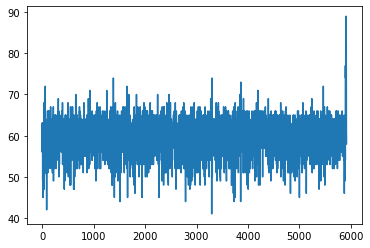

In [205]:
all_genes_df['AT content'].plot().hist